In [1]:
import numpy as np
import pandas as pd

tafe_survey = pd.read_csv('tafe_survey.csv' , na_values = 'Not Satated')
dete_survey = pd.read_csv('dete_survey.csv' , na_values = 'Not Satated')


# A look into the Data

After reading the datasets the amount of Data at hand is overwhelming. both the `tafe survey` and the `dete survey` have many columns holding diffrent information contributing to the topic we're investigating. Aside from some the DETE columns being phrased as questions as to describe them precisely, we are left with many columns that we don't fully understand which we might resort to dropping so we don't misinterpret any of it.

We also observe that there are many missing values from many rows which require further investigation to determine whether they can be filled or if we need to drop them all together. We've determined that the missing values should be updated with the value "Not Stated".

The columns which we'll rely on to answer most questions are :

DETE Survey :

 - `ID` :  an id used to identify the participant.
 - `Separation Type` : The reason why the employment ended.
 - `Cease Date` : The year or month the employment ended.
 - `DETE Start Date` : The year the person began employment with DETE.
 
TAFE Survey :

 - `Record ID` : an id used to identify the participant.
 - `Reason for ceasing employment` : the reason why the employment ended.
 - `LengthofServiceOverall. Overall length of Service at Institute (in years)` : the length of employment.

In [2]:
for col in ["Disability" , "NESB" , "South Sea" , "Torres Strait" , "Aboriginal"]:
    print(dete_survey[col].value_counts(dropna = False) , "\n")

NaN    799
Yes     23
Name: Disability, dtype: int64 

NaN    790
Yes     32
Name: NESB, dtype: int64 

NaN    815
Yes      7
Name: South Sea, dtype: int64 

NaN    819
Yes      3
Name: Torres Strait, dtype: int64 

NaN    806
Yes     16
Name: Aboriginal, dtype: int64 



In [3]:
tafe_missing_percentage = tafe_survey.isnull().sum() / tafe_survey.shape[0] * 100
tafe_missing_percentage

Record ID                                                                                                                                                         0.000000
Institute                                                                                                                                                         0.000000
WorkArea                                                                                                                                                          0.000000
CESSATION YEAR                                                                                                                                                    0.997151
Reason for ceasing employment                                                                                                                                     0.142450
Contributing Factors. Career Move - Public Sector                                                                                                

We'll start by investigating whether employees who've been there were less likely to experience dissatisfaction than employees who've worked for a short period of time, in other words :

**Does the time spent employed affect the likeliness of resignition due to dissatisfaction**


We'll start by dropping columns we will not be needing for this analysis, and then we'll go through the data to find out.

In [4]:
dete_survey = pd.read_csv('dete_survey.csv',
                          na_values="Not Stated")
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],
                                      axis=1)
tafe_survey = pd.read_csv('tafe_survey.csv',
                         na_values="Not Stated")
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],
                                     axis=1)

## Updates to the DataFrames

We re-read the data and replaced all the missing values by `Not Stated to` which was more sensible to the columns we were about to use since they all mostly had one value, we also dropped all columns we will not be using because they are irrelevant to our research.

In [5]:
def column_cleaner(col):
    col = col.lower()
    col = col.strip()
    col = col.replace(' ','_')
    return col
new_names = []
for col in dete_survey_updated.columns:
    new_names.append(column_cleaner(col))
dete_survey_updated.columns = new_names
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [6]:
col_names = {
    'Record ID' : 'id',
    'CESSATION YEAR' : 'cease_date',
    'Reason for ceasing employment' : 'separationtype',
    'Gender. What is your Gender?' : 'gender',
    'CurrentAge. Current Age' : 'age',
    'Employment Type. Employment Type' : 'employment_status',
    'Classification. Classification' : 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)' : 'institute_service'
}

new_tcols = []
for col in tafe_survey_updated.columns:
    col = col.strip()
    new_tcols.append(col)

tafe_survey_updated.columns = new_tcols

tafe_survey_updated.rename(mapper = col_names,axis=1 , inplace=True)
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [7]:
print("tafe separationtype value counts : \n")
print(tafe_survey_updated['separationtype'].value_counts())
print('-'*40)

print("dete separationtype value counts : \n")
print(dete_survey_updated['separationtype'].value_counts())
print('-'*40)

tafe separationtype value counts : 

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64
----------------------------------------
dete separationtype value counts : 

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64
----------------------------------------


In [8]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains("Resignation", regex=False , na=False)].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()
print("The number of resignations in the dete survey is : " ,len(dete_resignations))
print("The number of resignations in the tafe survey is : " , len(tafe_resignations))

The number of resignations in the dete survey is :  311
The number of resignations in the tafe survey is :  340


## Resignations
We created dataframes that only include the rows were some type of resignation was met for the `dete_survey` or resignation in general for the  `tafe_survey` in the `separationtype` column.

In [9]:
dete_resignations['cease_date'] = dete_resignations["cease_date"].str.split("/").str[-1].astype('float')
dete_resignations["institute_service"] = dete_resignations.cease_date - dete_resignations.dete_start_date.astype('float')

In [10]:
dete_resignations['institute_service'].value_counts(dropna=False)

NaN     38
5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
12.0     6
22.0     6
17.0     6
10.0     6
14.0     6
16.0     5
18.0     5
24.0     4
23.0     4
11.0     4
39.0     3
32.0     3
19.0     3
21.0     3
36.0     2
30.0     2
25.0     2
28.0     2
26.0     2
29.0     1
42.0     1
38.0     1
27.0     1
41.0     1
35.0     1
49.0     1
34.0     1
33.0     1
31.0     1
Name: institute_service, dtype: int64

In order to measure the effect of service period on the employe's likeliness to resign we created a column that has values of the period of service in the `dete_updated` DataFrame, luckly the `tafe_updated` didn't need any as it already had a `service` column that contained the information.

In [11]:
for col in ["Contributing Factors. Dissatisfaction" , "Contributing Factors. Job Dissatisfaction"]:
    print(col,'\n',tafe_resignations[col].value_counts(dropna=False))
    print('\n')

Contributing Factors. Dissatisfaction 
 -                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64


Contributing Factors. Job Dissatisfaction 
 -                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64




In [12]:
def update_vals(val):
    if val == '-':
        return False
    elif pd.isnull(val):
        return np.nan
    else:
        return True

In [13]:
tafe_resignations[["Contributing Factors. Dissatisfaction",
                   "Contributing Factors. Job Dissatisfaction"]] = tafe_resignations[["Contributing Factors. Dissatisfaction",
                   "Contributing Factors. Job Dissatisfaction"]].applymap(update_vals)

In [14]:
diss_tafe_cols = ["Contributing Factors. Dissatisfaction",
                   "Contributing Factors. Job Dissatisfaction"]
diss_dete_cols = ["job_dissatisfaction",
                 "dissatisfaction_with_the_department",
                 "physical_work_environment",
                 "lack_of_recognition",
                 "lack_of_job_security",
                 "work_location",
                 "employment_conditions",
                 "work_life_balance",
                 "workload"]

In [15]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

In [16]:
tafe_resignations_up["dissatisfied"] = tafe_resignations[diss_tafe_cols].any(axis=1, skipna=False)
dete_resignations_up["dissatisfied"] = dete_resignations[diss_dete_cols].any(axis=1, skipna=False)

In [17]:
print("tafe resignations columns length :\n" , len(tafe_resignations_up.columns))
print('-'*40)
print("dete resingations columns length :\n" , len(dete_resignations_up.columns))

tafe resignations columns length :
 24
----------------------------------------
dete resingations columns length :
 37


In [28]:
tafe_resignations_up["institute"] = "TAFE"
dete_resignations_up["institute"] = "DETE"

combined = pd.concat([tafe_resignations_up, dete_resignations_up], sort=False)
len(combined)

651

In [19]:
combined_updated = combined.dropna(thresh=500 , axis=1)
combined_updated.columns

Index(['age', 'cease_date', 'dissatisfied', 'employment_status', 'gender',
       'id', 'institute', 'institute_service', 'position', 'separationtype'],
      dtype='object')

After thoroughly cleaning both datasets, verifying the quality of the data and finally dropping and creating columns according to our needs, we combined both datasets.

In [20]:
combined_updated.institute_service.value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
20.0                   7
15.0                   7
10.0                   6
22.0                   6
17.0                   6
12.0                   6
14.0                   6
16.0                   5
18.0                   5
23.0                   4
11.0                   4
24.0                   4
19.0                   3
21.0                   3
39.0                   3
32.0                   3
30.0                   2
25.0                   2
26.0                   2
36.0                   2
28.0                   2
49.0                   1


In [21]:
combined_updated["institute_service"] = combined_updated.institute_service.astype('str').str.extract(r'(\d+)' , expand=False)
combined_updated["institute_service"] = combined_updated.institute_service.astype('float')
combined_updated.institute_service.value_counts()

/home/default3322/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/default3322/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
6.0      17
20.0     17
4.0      16
9.0      14
2.0      14
8.0       8
13.0      8
15.0      7
22.0      6
14.0      6
17.0      6
12.0      6
10.0      6
18.0      5
16.0      5
23.0      4
24.0      4
21.0      3
19.0      3
32.0      3
39.0      3
30.0      2
26.0      2
36.0      2
28.0      2
25.0      2
35.0      1
38.0      1
34.0      1
33.0      1
49.0      1
41.0      1
27.0      1
42.0      1
29.0      1
31.0      1
Name: institute_service, dtype: int64

In [22]:
def service_catter(x):
    if x < 3:
        return 'New'
    elif (x < 6) and (x >= 3):
        return 'Experienced'
    elif (x >= 7) and  (x <= 10):
        return 'Established'
    elif pd.isnull(x):
        return np.nan
    else : 
        return 'Veteran'

In [23]:
combined_updated["service_cat"] = combined_updated.institute_service.apply(lambda x : service_catter(x))
combined_updated['service_cat'].value_counts()

/home/default3322/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


New            193
Experienced    155
Veteran        153
Established     62
Name: service_cat, dtype: int64

In [24]:
combined_updated.dissatisfied.value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [25]:
combined_updated['dissatisfied'].fillna(False , inplace = True)

/home/default3322/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [26]:
pv_dis_ser = combined_updated.pivot_table(index = 'service_cat'
                                          ,values = 'dissatisfied')

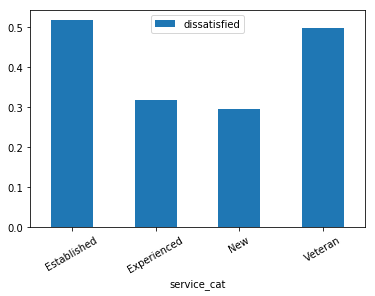

In [27]:
%matplotlib inline
pv_dis_ser.plot(kind='bar' , rot=30)

From the barplot, we conclude that `Established` employees are the most likely to resign due to some kind of dissatisfaction.

In [29]:
combined_updated.age.value_counts()

51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
31  35           32
36  40           32
26  30           32
31-35            29
21-25            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [34]:
combined_updated_ages = combined_updated["age"]
combined_updated_ages = combined_updated_ages.astype("str").str.extract(r"(\d+)", expand=False).astype("float")
combined_updated["clean_age"] = combined_updated_ages

After cleaning the ages of the employees from both surveys we'll set out to find whether being of certain age groups affects whether the employee resigns due to some kind of dissatissfaction.

In [37]:
combined_updated_ages.value_counts().sort_index()

20.0    10
21.0    62
26.0    67
31.0    61
36.0    73
41.0    93
46.0    81
51.0    71
56.0    55
61.0    23
Name: age, dtype: int64

In [38]:
def age_group(age):
    if 20 <= age <= 24:
        return "Young Adult"
    elif 25 <= age <= 54 :
        return "Adult"
    elif 55 <= age <= 64 :
        return "Senior"

we created a function that helps put employees in age categories accordingly, there are 3 age categories `Young Adult`, `Adult` and `Senior`. The ranges were from the research mentionned below.

<a href = 'https://data.oecd.org/emp/employment-rate-by-age-group.htm'>OECD (2019), Employment rate by age group (indicator). doi: 10.1787/084f32c7-en (Accessed on 13 May 2019)

In [39]:
combined_updated["age_cat"] = combined_updated["clean_age"].apply(lambda x : age_group(x))
combined_updated.age_cat.value_counts()

Adult          446
Senior          78
Young Adult     72
Name: age_cat, dtype: int64

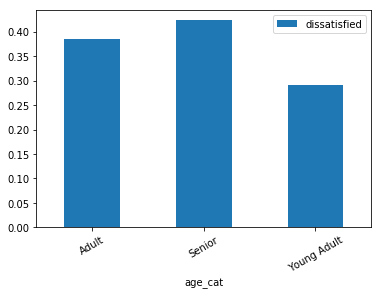

In [41]:
age_cat_diss_pv = combined_updated.pivot_table(index = "age_cat" , values = "dissatisfied")
age_cat_diss_pv.plot(kind="bar" , rot=30)

Most employees who resign after some kind of dissatisfaction are Senior employees.